In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

%matplotlib notebook

In [2]:
# READ DATA: Blade landings 

blade_landings= pd.read_csv('blade_landing_helihoist_sbitroot.txt')

# make epoch index of dataframe and convert epoch into readable dates
blade_landings.epoch_land= blade_landings.epoch_land.apply(lambda x: pd.to_datetime(x, unit= 's', utc=True))

# convert blade landings of turbine 8 into readable dates
blade_landing1= pd.to_datetime(1.571127e+09	, unit='s', utc=True)
blade_landing2= pd.to_datetime(1.571154e+09, unit='s', utc=True)
blade_landing3= pd.to_datetime(1.571188e+09, unit='s', utc=True)

In [33]:
# Read csv files of GPS Data: turbine 8

# sbitroot
gps_sbitroot_tb8= pd.read_csv('turbine-08_sbitroot_tom_gps.csv')
gps_sbitroot_tb8.epoch= pd.to_datetime(gps_sbitroot_tb8.epoch, unit= 's', utc=True)
gps_sbitroot_tb8.set_index('epoch', inplace=True)

# sbittip
gps_sbittip_tb8= pd.read_csv('turbine-08_sbittip_tom_gps.csv')
gps_sbittip_tb8.epoch= pd.to_datetime(gps_sbittip_tb8.epoch, unit= 's', utc=True)
gps_sbittip_tb8.set_index('epoch', inplace=True)

# helihoist
gps_helih_tb8= pd.read_csv('turbine-08_helihoist-1_tom_gps.csv')
gps_helih_tb8.epoch= pd.to_datetime(gps_helih_tb8.epoch, unit= 's', utc=True)
gps_helih_tb8.set_index('epoch', inplace=True)

In [35]:
# Find blade installation period in data

hub_height = 90 # hub height = 90m

# smoothing the time series: cut the outliers and find the 20min mean value
hh, sr, st = (gps_helih_tb8.altitude.resample('1s').mean().rolling('20min').mean(), gps_sbitroot_tb8.altitude.resample('1s').mean().rolling('20min').mean(), gps_sbittip_tb8.altitude.resample('1s').mean().rolling('20min').mean())

hh_sbi = hh[(hh > hub_height) & (sr > hub_height) & (st > hub_height)]
sr_sbi = sr[(hh > hub_height) & (sr > hub_height) & (st > hub_height)]
st_sbi = st[(hh > hub_height) & (sr > hub_height) & (st > hub_height)]

# determine start and end period of single blade installations
inst_period = sr_sbi[sr_sbi.index.to_series().diff() > pd.to_timedelta(60, unit='s')].index.to_list()
inst_period.insert(0, sr_sbi.index[0])
inst_period.insert(len(inst_period), sr_sbi.index[-1])
sbi_indices = list()

for i in range(len(inst_period) - 1):
    sbi_indices.append((inst_period[i], hh_sbi[inst_period[i]:inst_period[i+1]].index[-2]))

# SBIT

In [4]:
# Blade landing 
landing1_tb8= pd.read_csv('turbine-08_sbitroot_tom_acc-vel-pos_2019-10-15-08-08-20_2019-10-15-08-36-04.csv')
landing1_tb8.epoch= pd.to_datetime(landing1_tb8.epoch, unit= 's', utc=True)
landing1_tb8.set_index('epoch', inplace=True)
#turbine-08_sbitroot_tom_acc-vel-pos_2019-10-16-00-42-26_2019-10-16-01-10-10.csv (blade landing 3)

# Blade installation: impact event
imp1_tb8= pd.read_csv('turbine-08_sbitroot_tom_acc-vel-pos_2019-10-15-07-40-56_2019-10-15-08-08-20.csv')
imp1_tb8.epoch= pd.to_datetime(imp1_tb8.epoch, unit= 's', utc=True)
imp1_tb8.set_index('epoch', inplace=True)

# Blade installation period: before landing
inst1_tb8= pd.read_csv('turbine-08_sbitroot_tom_acc-vel-pos_2019-10-15-07-13-34_2019-10-15-07-40-56.csv')
inst1_tb8.epoch= pd.to_datetime(inst1_tb8.epoch, unit= 's', utc=True)
inst1_tb8.set_index('epoch', inplace=True)

<IPython.core.display.Javascript object>


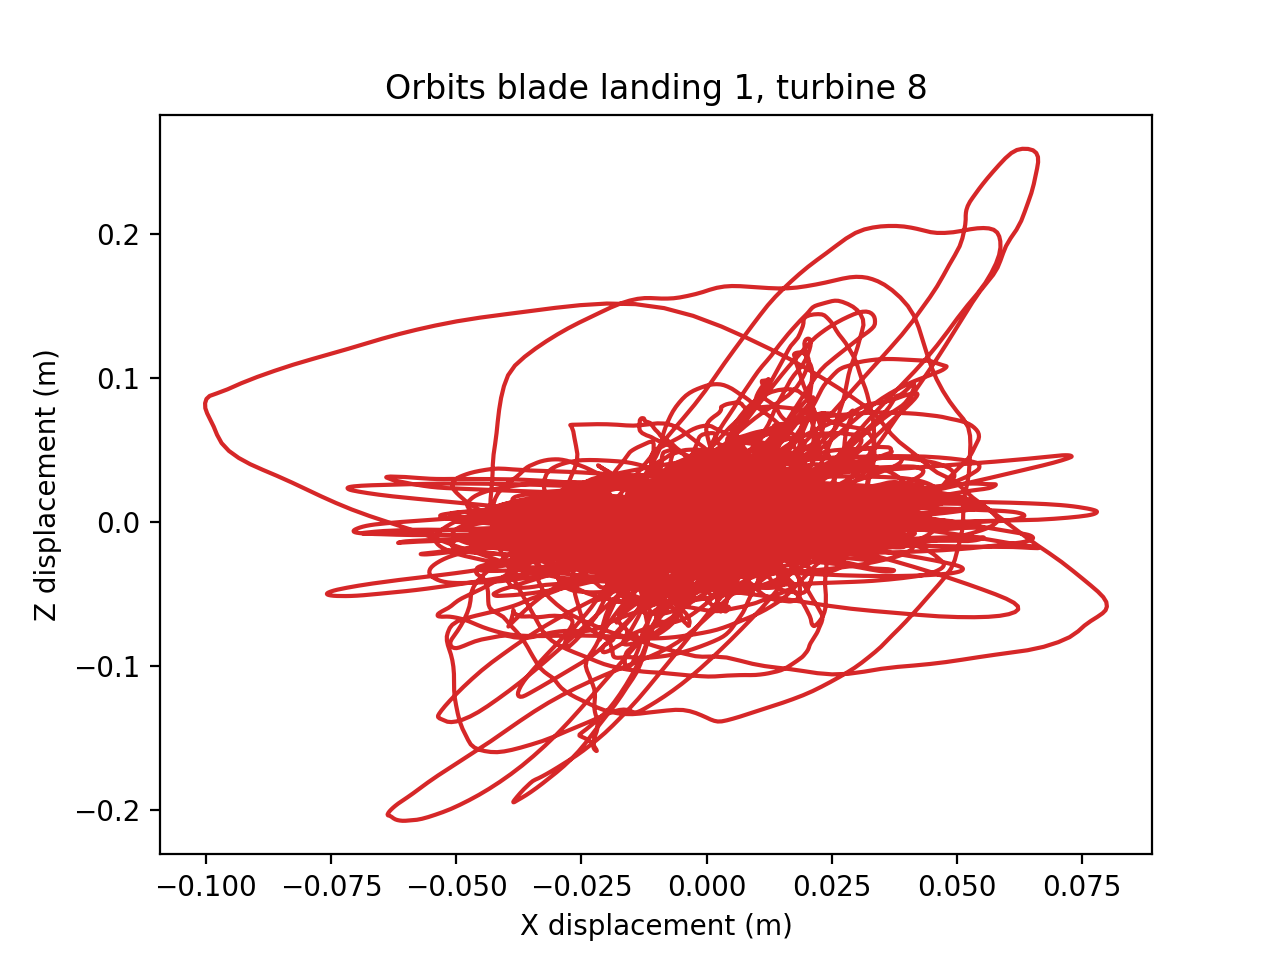

In [7]:
# ORBITS BLADE LANDING 3

plt.figure()
plt.plot(landing1_tb8.pos_x, landing1_tb8.pos_z, 'tab:red')
plt.xlabel('X displacement (m)')
plt.ylabel('Z displacement (m)')
plt.title('Orbits blade landing 1, turbine 8')
plt.savefig('tb8_orbits_sbit_landing_b1', dpi=300)

<IPython.core.display.Javascript object>


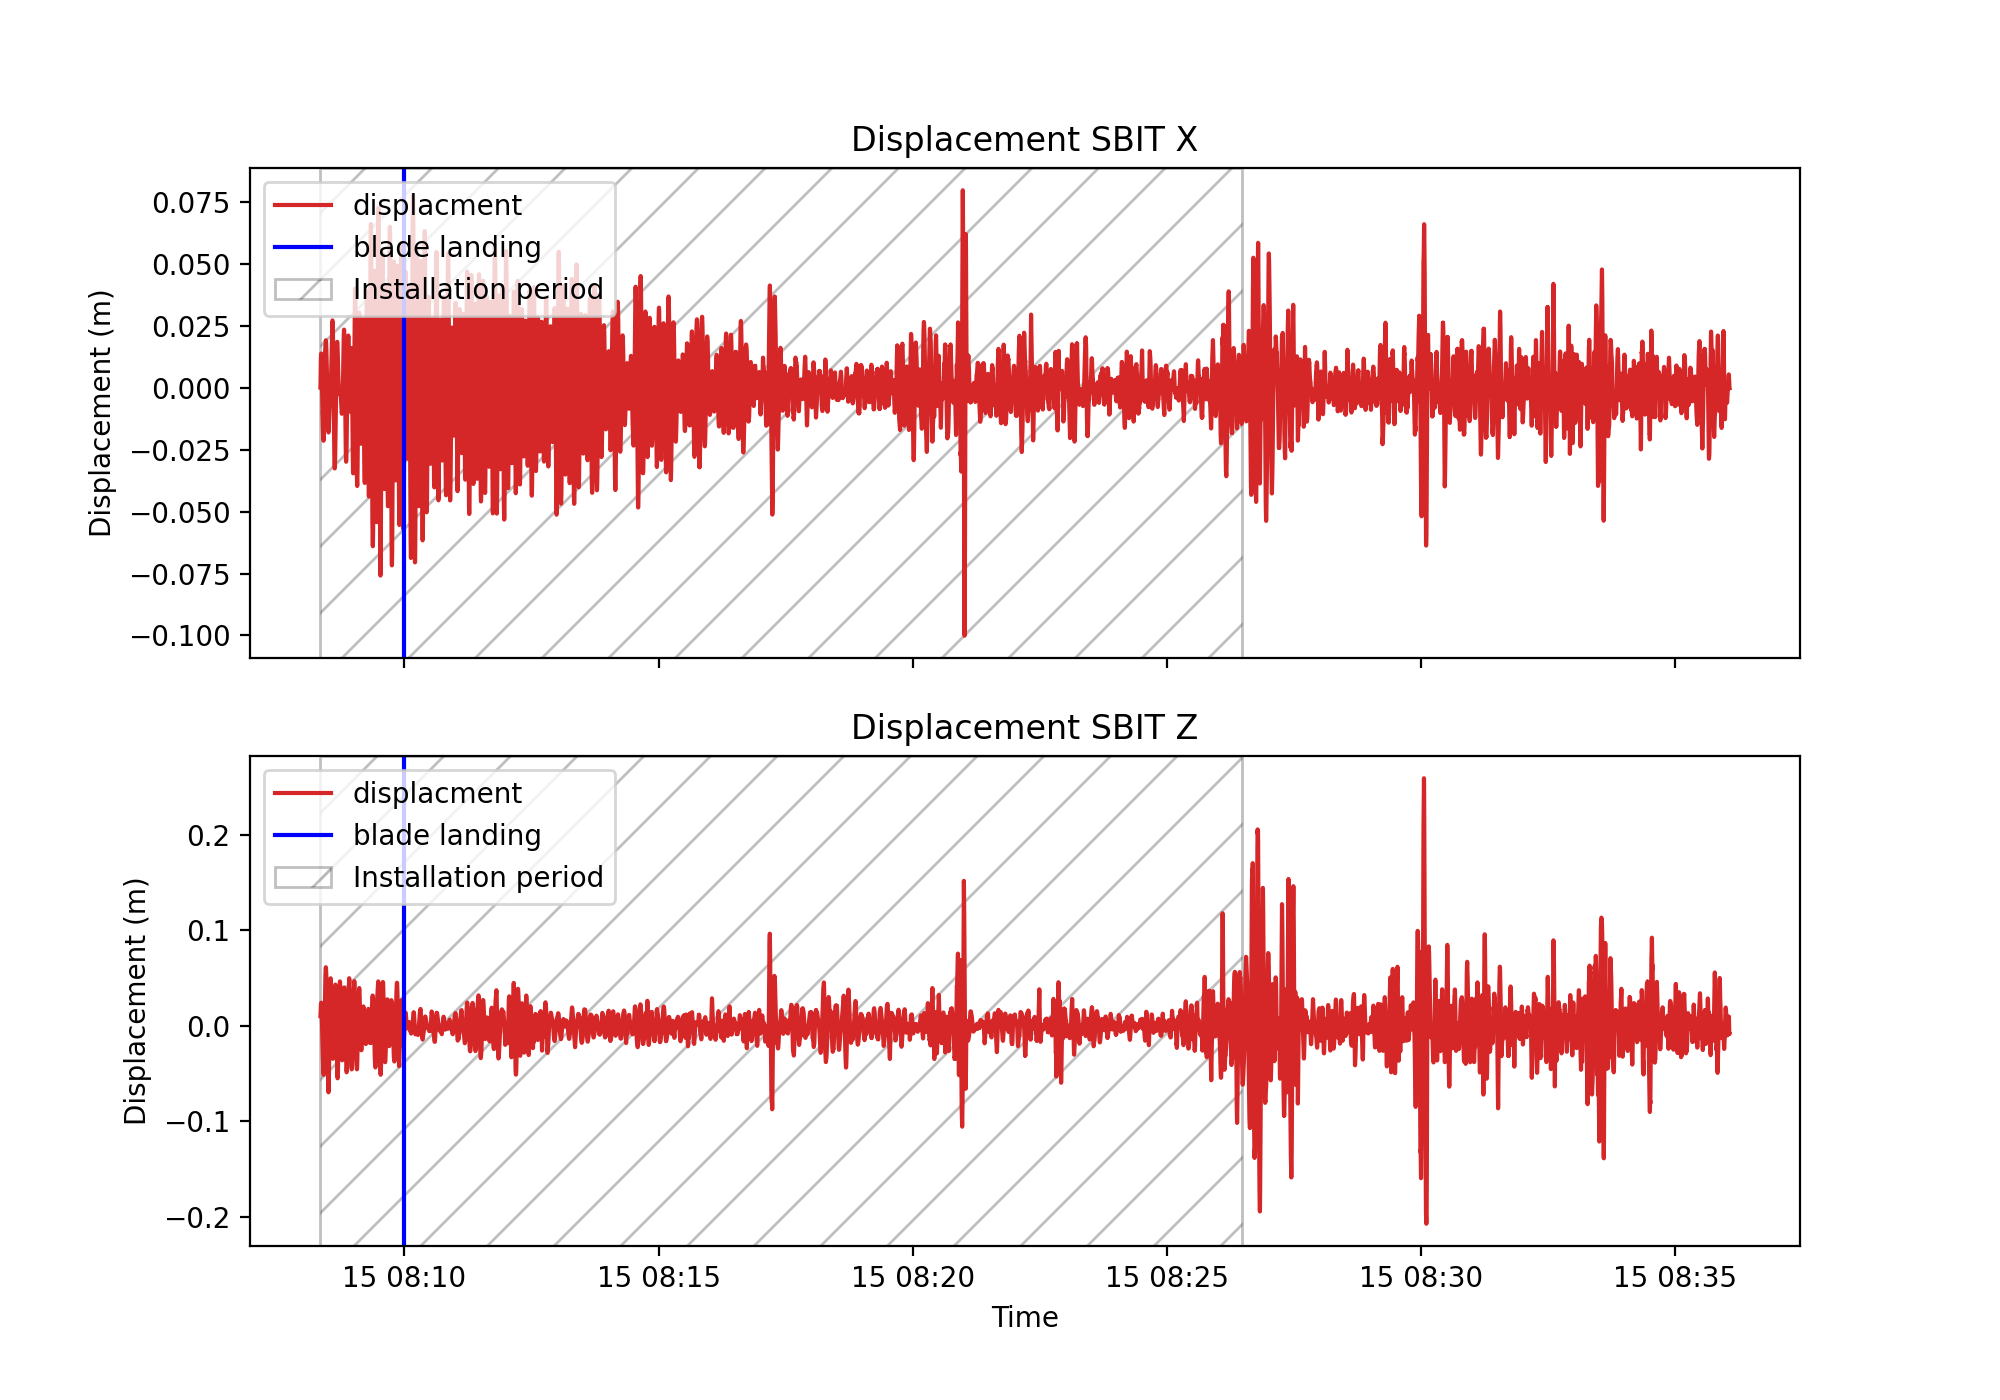

Text(0.5, 0, 'Time')

In [43]:
fig, axs = plt.subplots(2, sharex=True, figsize= (10,7))

axs[0].plot(landing1_tb8.pos_x, 'tab:red', label= 'displacment')
axs[0].set_title("Displacement SBIT X during landing")
axs[0].set(ylabel='Displacement (m)')
axs[0].axvline(x=blade_landing1, color='b', label= 'blade landing')
axs[0].axvspan(xmin=landing1_tb8.index[0], xmax=sbi_indices[1][1], hatch='/', facecolor='white', alpha=0.25, edgecolor='k', label='Installation period')
axs[0].legend(loc="upper left")

axs[1].plot(landing1_tb8.pos_z, 'tab:red', label='displacment')
axs[1].set_title("Displacement SBIT Z during landing")
axs[1].set(ylabel='Displacement (m)')
axs[1].axvline(x=blade_landing1, color='b', label= 'blade landing')
axs[1].axvspan(xmin=landing1_tb8.index[0], xmax=sbi_indices[1][1], hatch='/', facecolor='white', alpha=0.25, edgecolor='k', label='Installation period')
axs[1].legend(loc="upper left")

plt.xlabel('Time')
#plt.savefig('displacement_blade_landings', dpi=300)

<IPython.core.display.Javascript object>


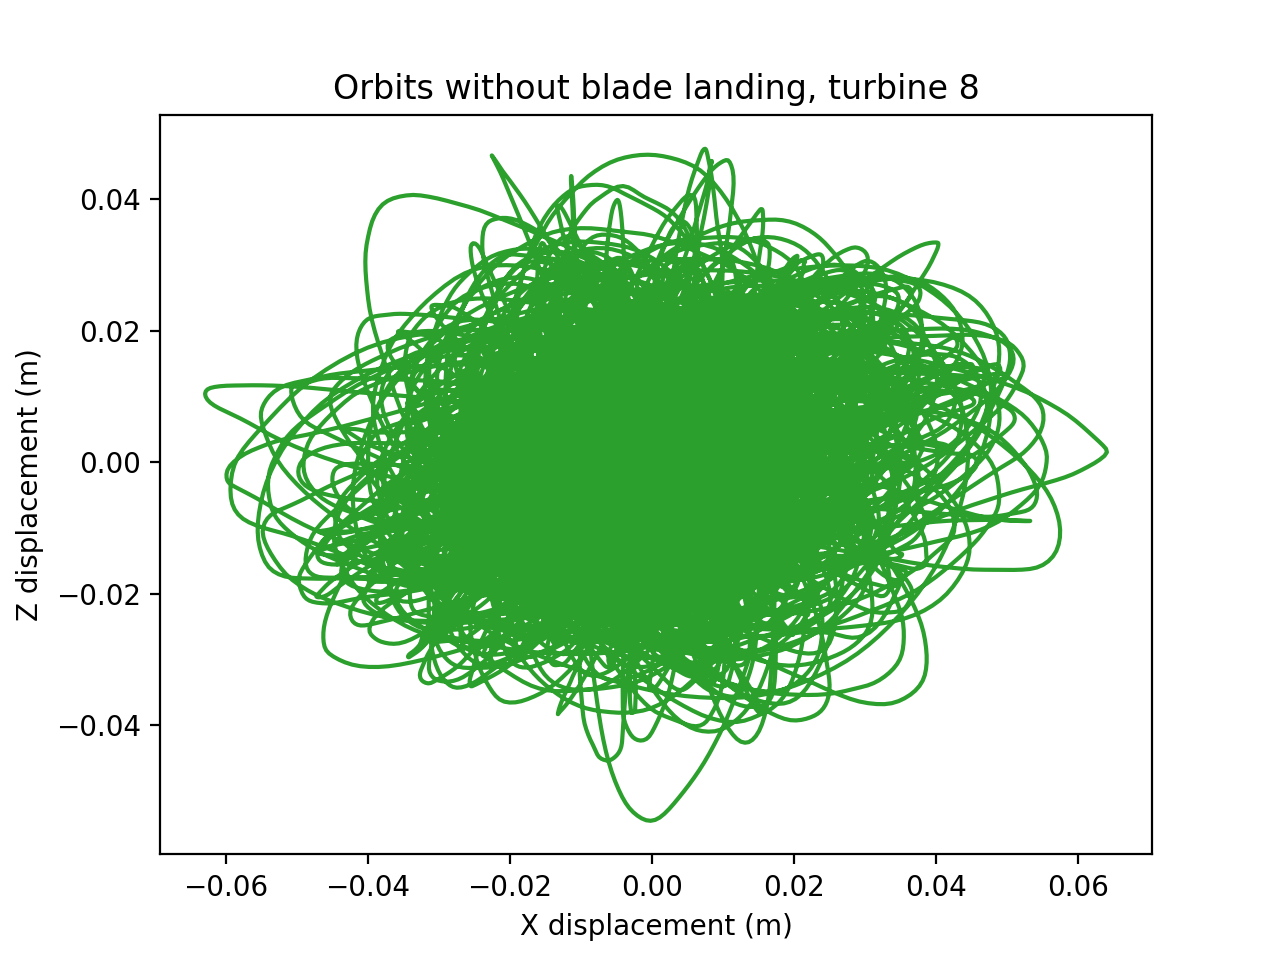

In [8]:
# ORBITS WITHOUT LANDING

plt.figure()
plt.plot(inst1_tb8.pos_x, inst1_tb8.pos_z, 'tab:green')
plt.xlabel('X displacement (m)')
plt.ylabel('Z displacement (m)')
plt.title('Orbits without blade landing, turbine 8')
plt.savefig('tb8_orbits_sbit_nolanding', dpi=300)

In [51]:
print(len(inst1_tb8.pos_x))

49755


<IPython.core.display.Javascript object>


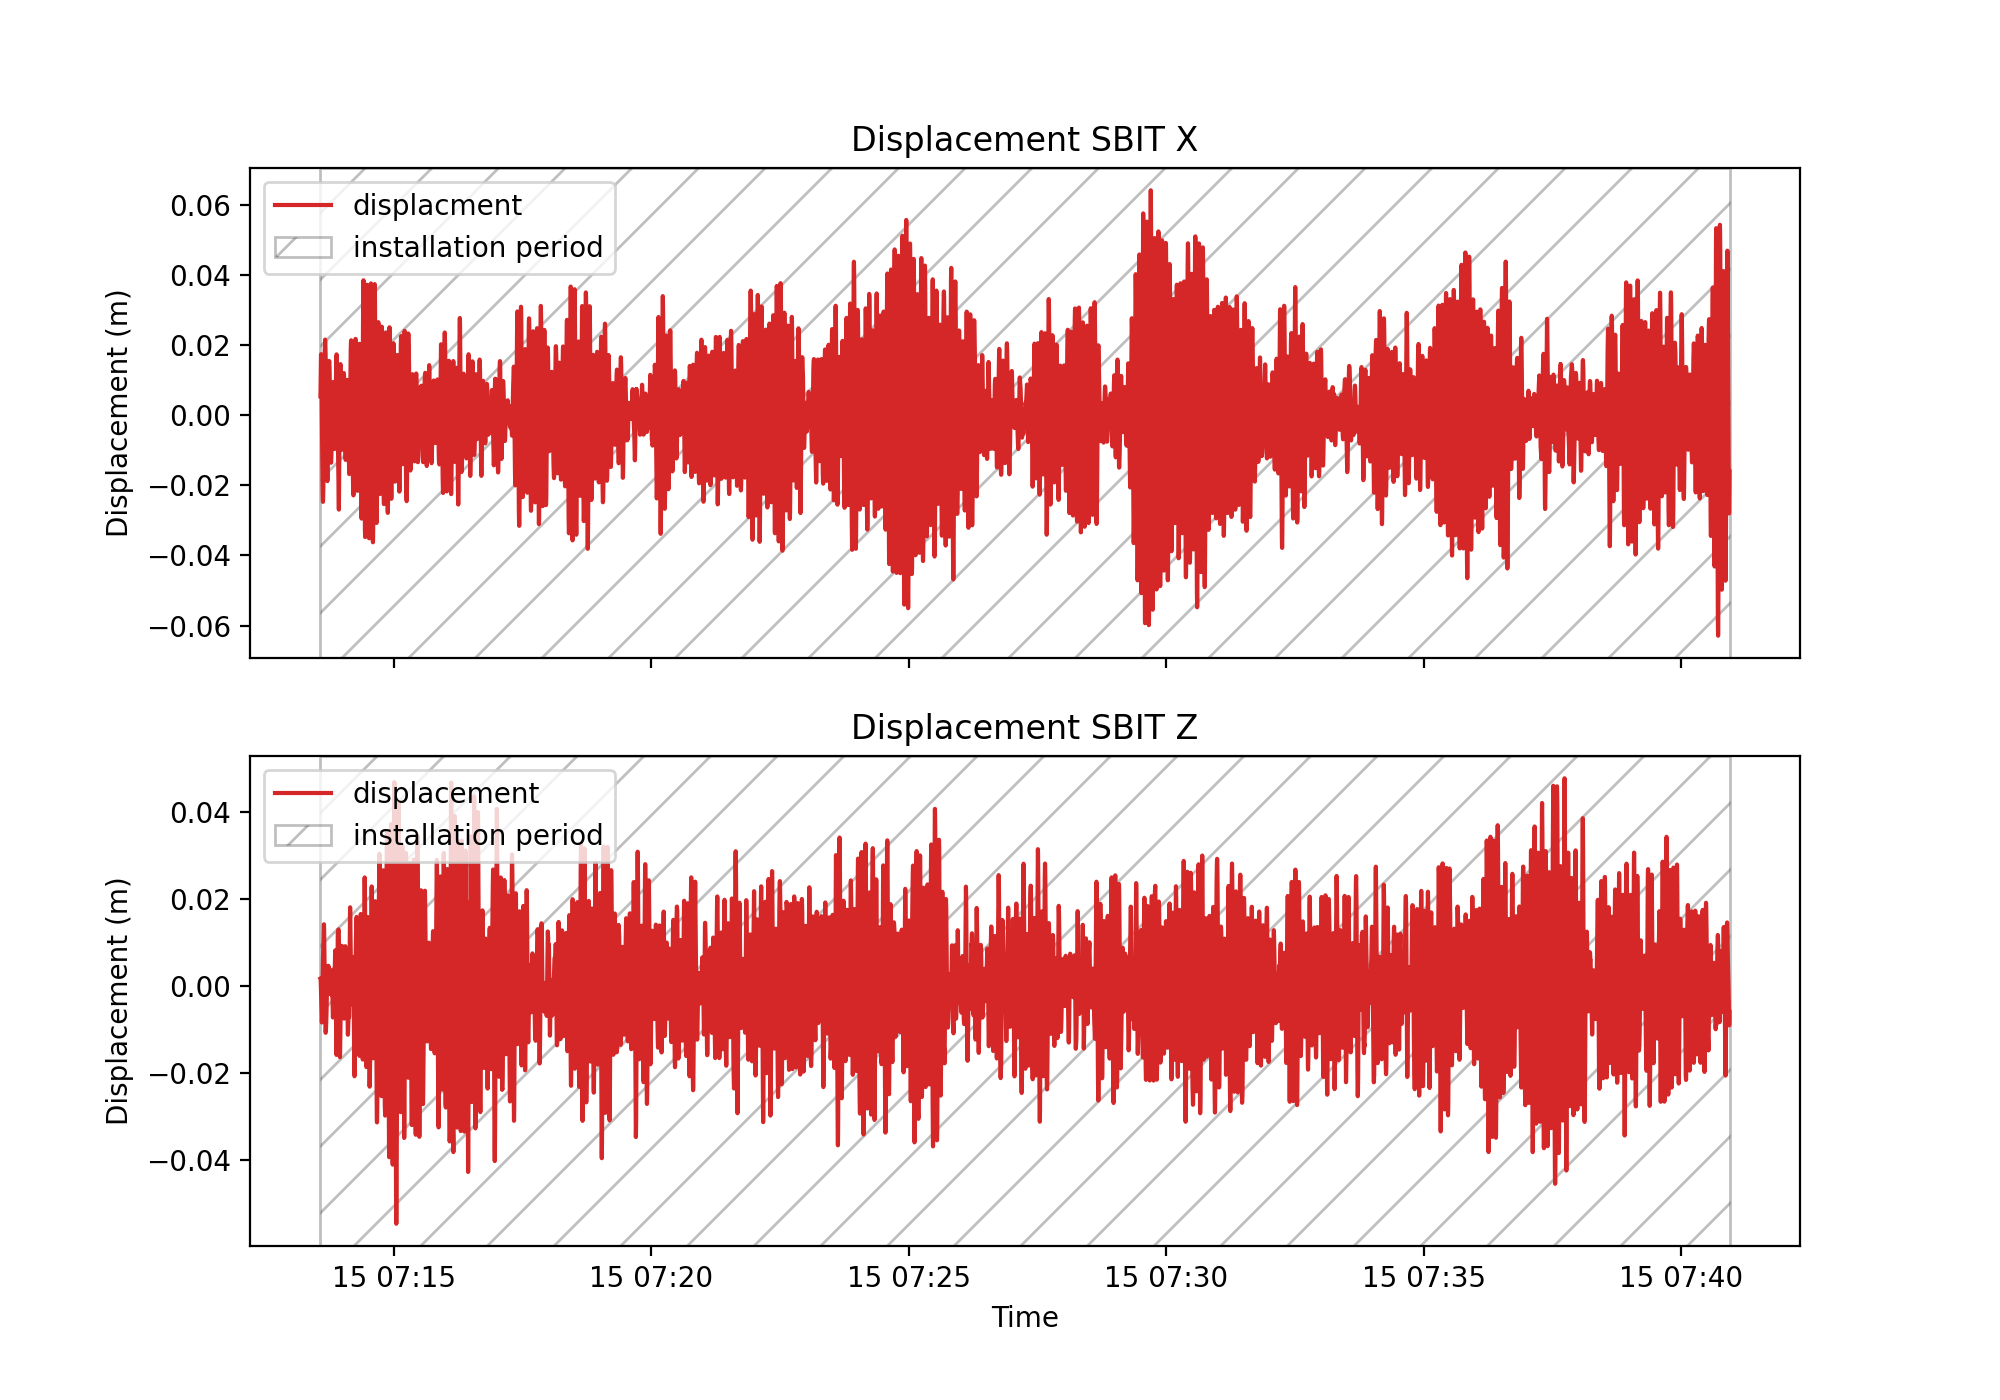

Text(0.5, 0, 'Time')

In [53]:
fig, axs = plt.subplots(2, sharex=True, figsize= (10,7))

axs[0].plot(inst1_tb8.pos_x, 'tab:red', label= 'displacment')
axs[0].set_title("Displacement SBIT X free oscillations")
axs[0].set(ylabel='Displacement (m)')
axs[0].axvspan(xmin=inst1_tb8.pos_x.index[0], xmax=inst1_tb8.pos_x.index[49754], hatch='/', facecolor='white', alpha=0.25, edgecolor='k', label= 'installation period')   
axs[0].legend(loc="upper left")

axs[1].plot(inst1_tb8.pos_z, 'tab:red', label='displacement')
axs[1].set_title("Displacement SBIT Z free  oscillations")
axs[1].set(ylabel='Displacement (m)')
axs[1].axvspan(xmin=inst1_tb8.pos_x.index[0], xmax=inst1_tb8.pos_x.index[49754], hatch='/', facecolor='white', alpha=0.25, edgecolor='k', label= 'installation period')   
axs[1].legend(loc="upper left")

plt.xlabel('Time')
#plt.savefig('displacement_blade_landings', dpi=300)

<IPython.core.display.Javascript object>


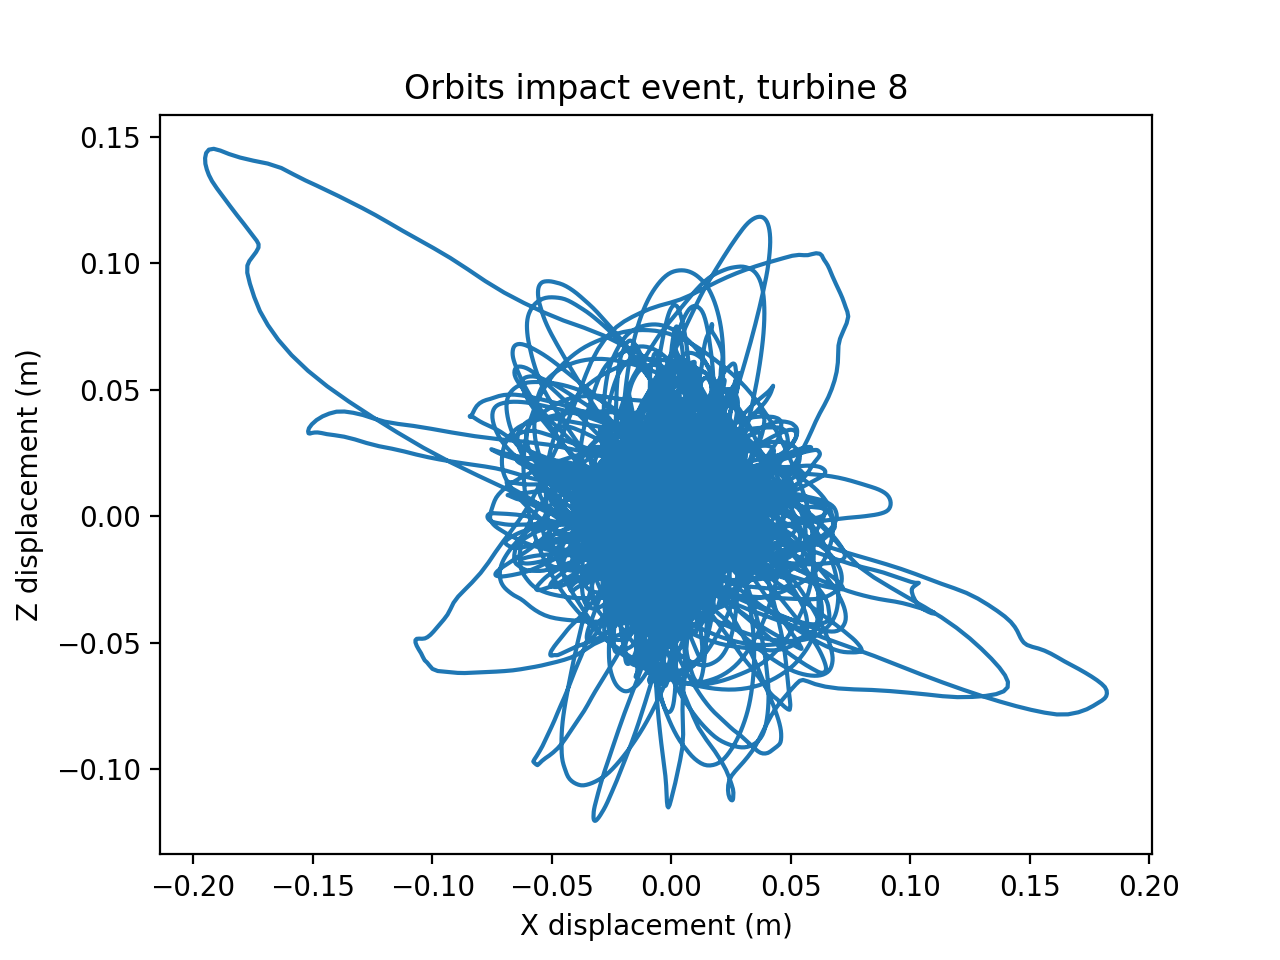

In [9]:
# IMPACT EVENT

plt.figure()
plt.plot(imp1_tb8.pos_x, imp1_tb8.pos_z, 'tab:blue')
plt.xlabel('X displacement (m)')
plt.ylabel('Z displacement (m)')
plt.title('Orbits impact event, turbine 8')
plt.savefig('tb8_orbits_sbit_impact', dpi=300)

<IPython.core.display.Javascript object>


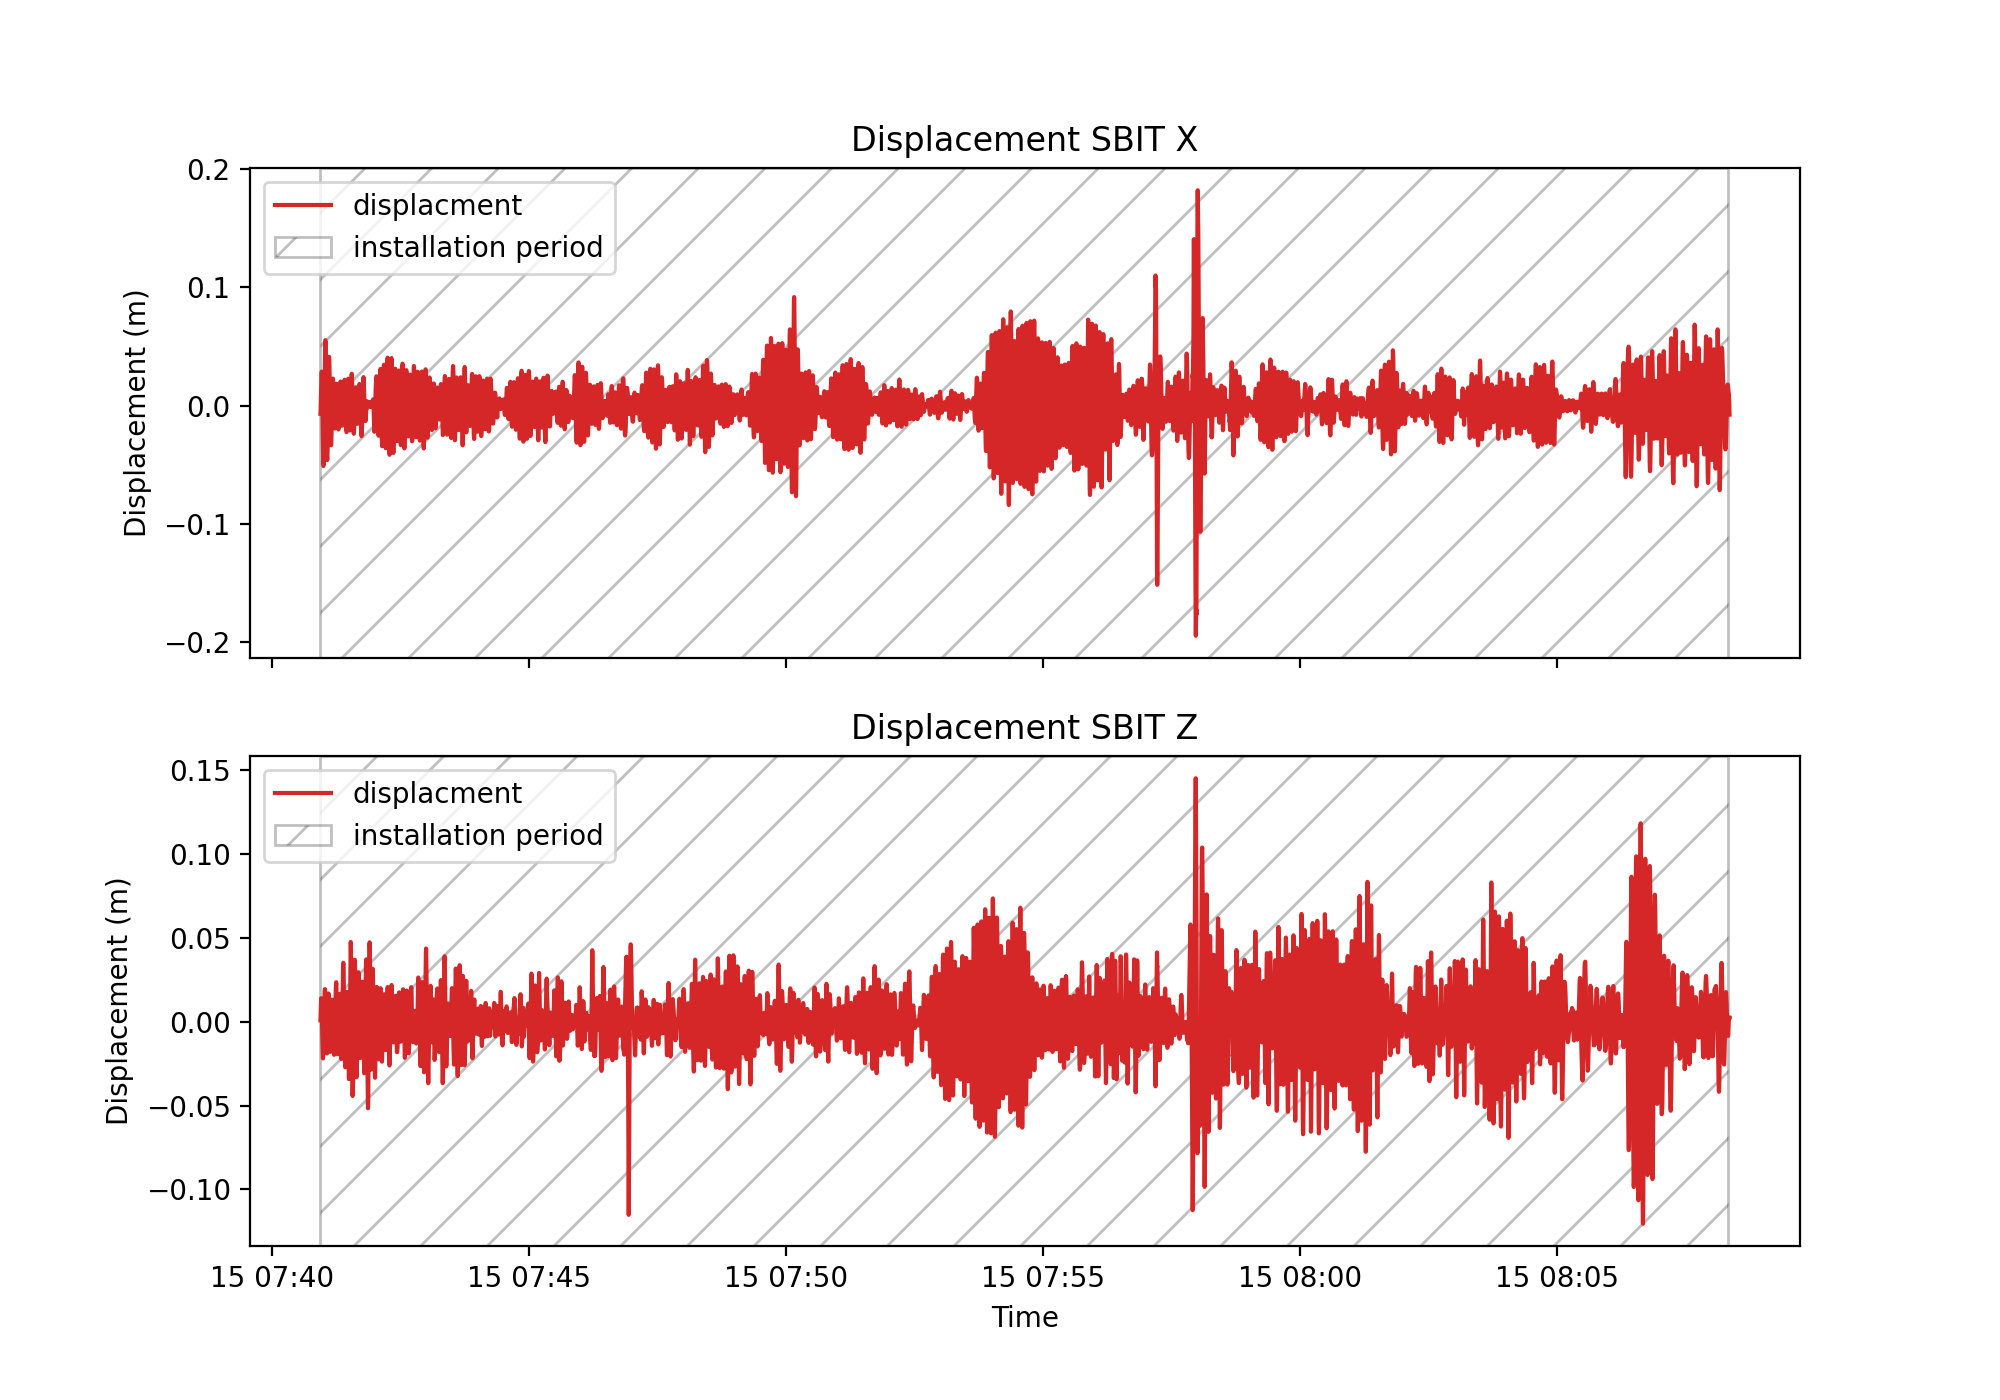

Text(0.5, 0, 'Time')

In [57]:
fig, axs = plt.subplots(2, sharex=True, figsize= (10,7))

axs[0].plot(imp1_tb8.pos_x, 'tab:red', label = 'displacment')
axs[0].set_title("Displacement SBIT X during impact")
axs[0].set(ylabel='Displacement (m)')
axs[0].axvspan(xmin=imp1_tb8.pos_x.index[0], xmax=imp1_tb8.pos_x.index[49754], hatch='/', facecolor='white', alpha=0.25, edgecolor='k', label='installation period')   
axs[0].legend(loc="upper left")

axs[1].plot(imp1_tb8.pos_z, 'tab:red', label= 'displacment')
axs[1].set_title("Displacement SBIT Z during impact")
axs[1].set(ylabel='Displacement (m)')
axs[1].axvspan(xmin=imp1_tb8.pos_x.index[0], xmax=imp1_tb8.pos_x.index[49754], hatch='/', facecolor='white', alpha=0.25, edgecolor='k', label='installation period')   
axs[1].legend(loc="upper left")

plt.xlabel('Time')
#plt.savefig('displacement_blade_landings', dpi=300)

# Tower

In [11]:
# READ DATA TOWER

# Blade installation period: landing time
tower_landing1_tb8= pd.read_csv('turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-15-07-57-08_2019-10-15-08-23-52.csv')
tower_landing1_tb8.epoch= pd.to_datetime(tower_landing1_tb8.epoch, unit= 's', utc=True)
tower_landing1_tb8.set_index('epoch', inplace=True)

# Blade installation period: impact event
tower_impact_tb8= pd.read_csv('turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-15-07-30-26_2019-10-15-07-57-08.csv')
tower_impact_tb8.epoch= pd.to_datetime(tower_impact_tb8.epoch, unit= 's', utc=True)
tower_impact_tb8.set_index('epoch', inplace=True)

# Blade installation period: before landing
tower_tb8= pd.read_csv('turbine-08_helihoist-1_tom_acc-vel-pos_2019-10-15-07-03-49_2019-10-15-07-30-26.csv')
tower_tb8.epoch= pd.to_datetime(tower_tb8.epoch, unit= 's', utc=True)
tower_tb8.set_index('epoch', inplace=True)

<IPython.core.display.Javascript object>


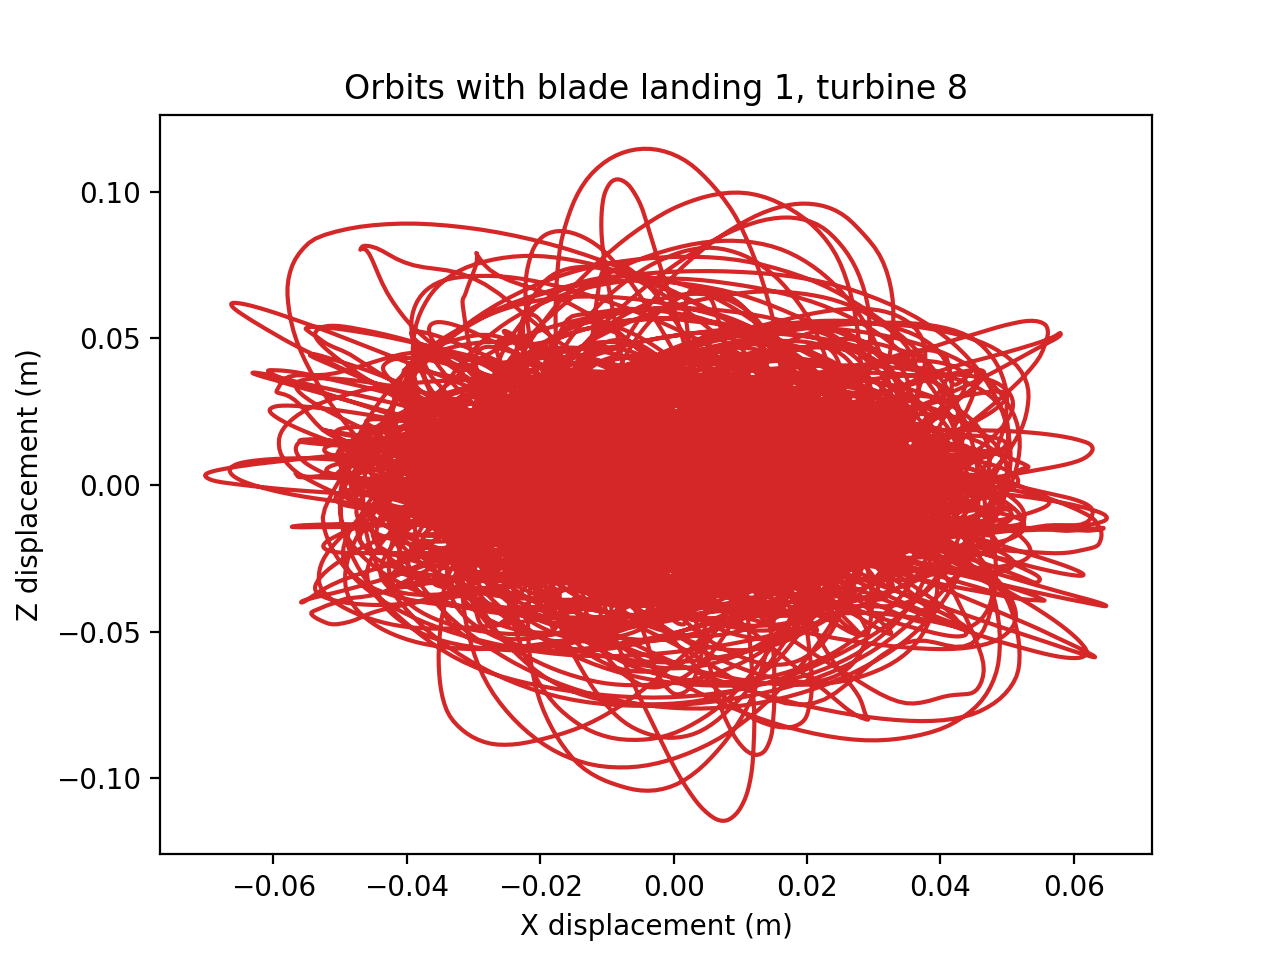

In [12]:
# ORBITS WITH LANDING TOWER

plt.figure()
plt.plot(tower_landing1_tb8.pos_x, tower_landing1_tb8.pos_z, 'tab:red')
plt.xlabel('X displacement (m)')
plt.ylabel('Z displacement (m)')
plt.title('Orbits with blade landing 1, turbine 8')
plt.savefig('tb8_orbits_tower_landing1', dpi=300)

<IPython.core.display.Javascript object>


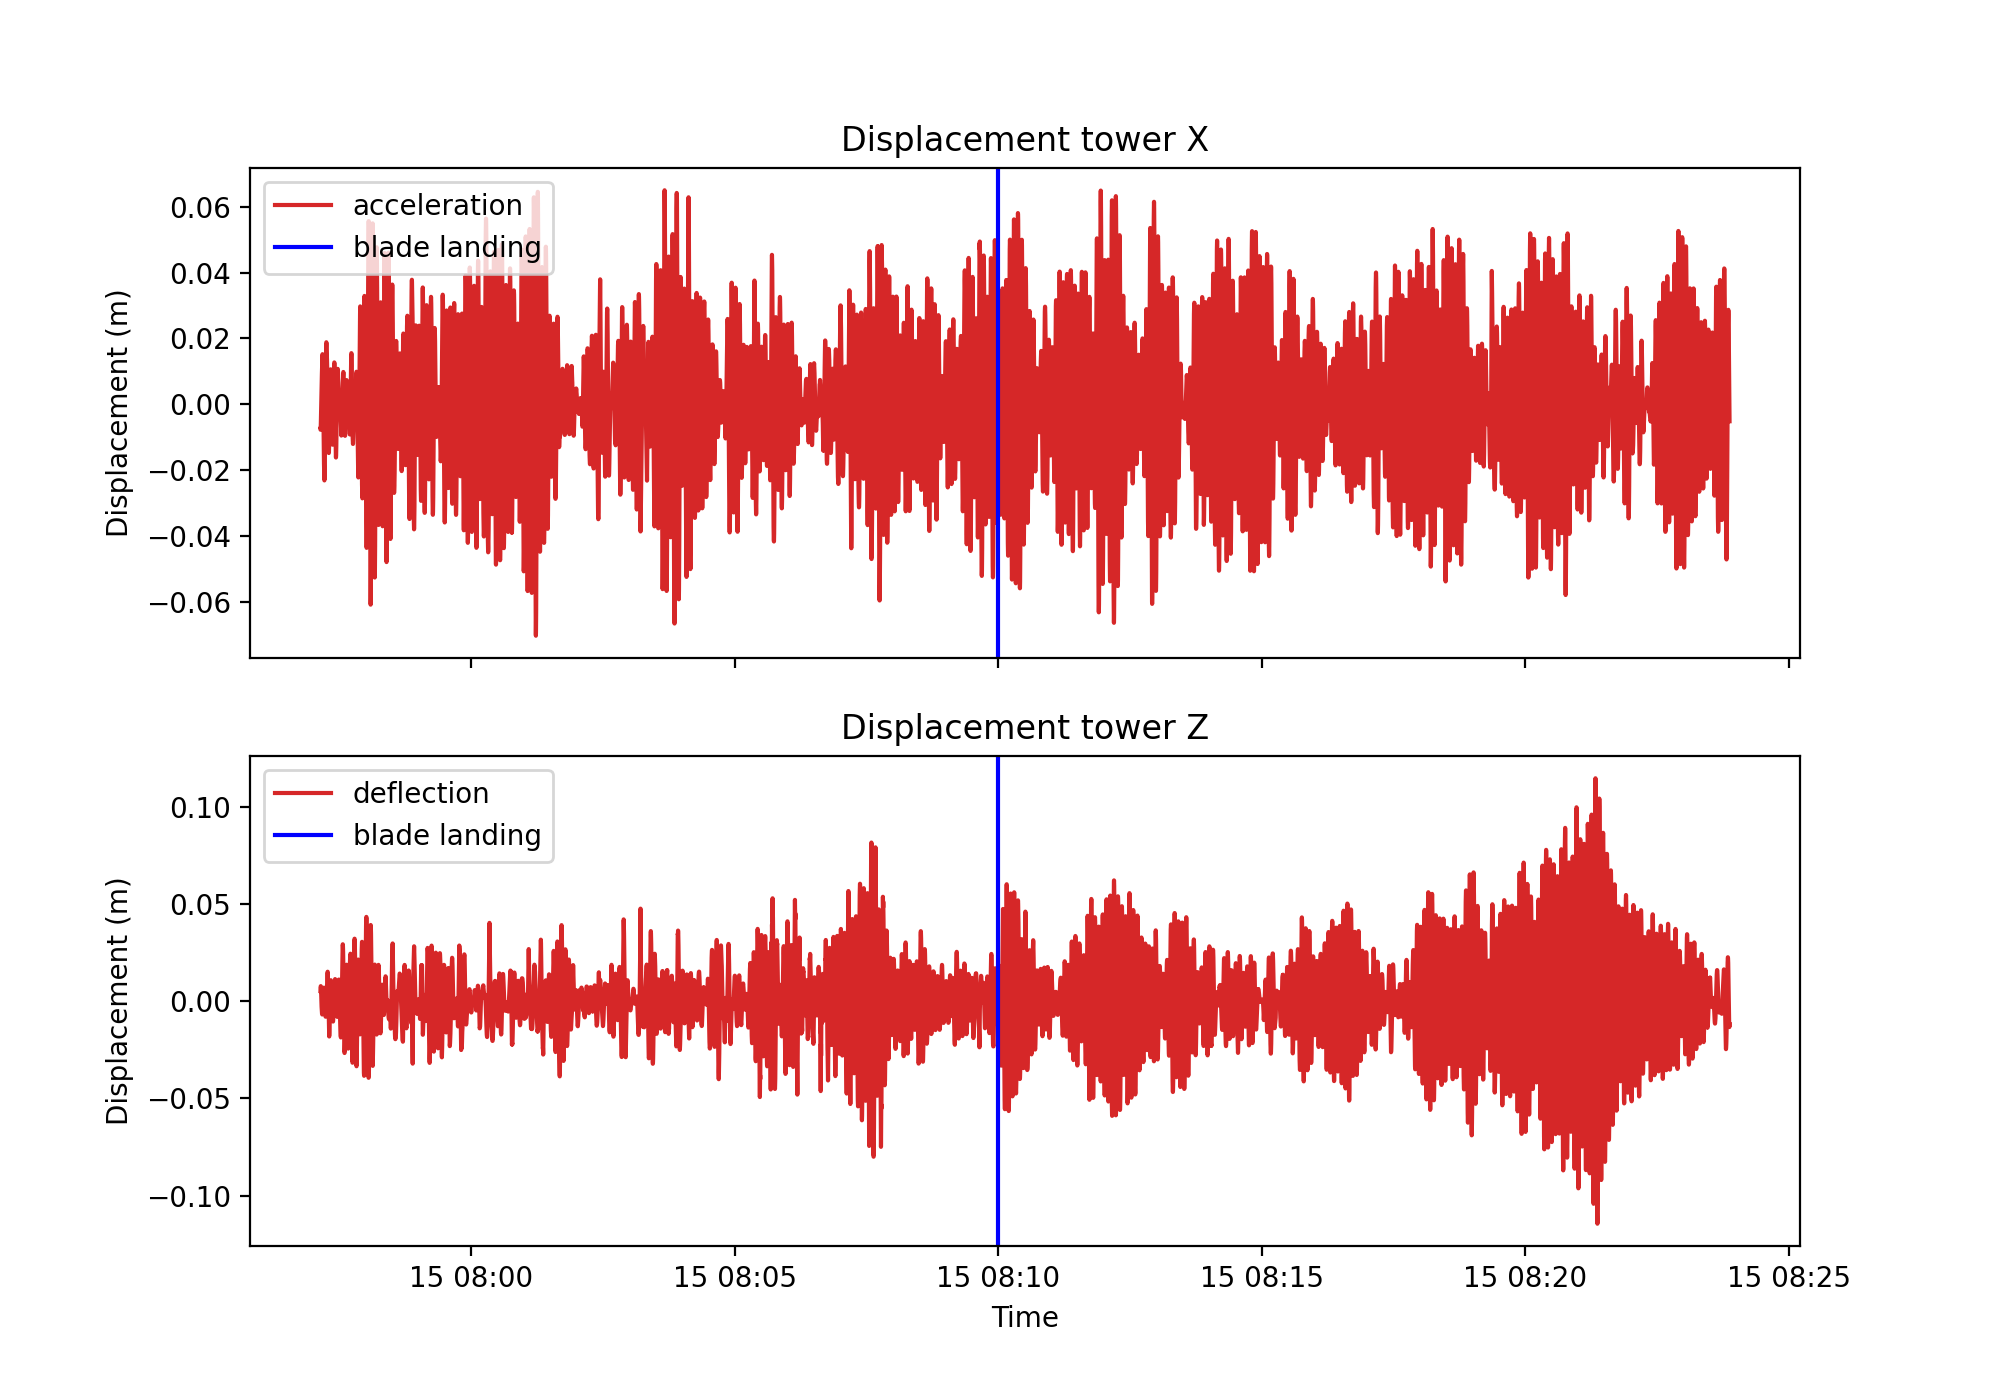

Text(0.5, 0, 'Time')

In [28]:
fig, axs = plt.subplots(2, sharex=True, figsize= (10,7))

axs[0].plot(tower_landing1_tb8.pos_x, 'tab:red', label= 'displacement')
axs[0].set_title("Displacement tower X")
axs[0].set(ylabel='Displacement (m)')
axs[0].axvline(x=blade_landing1, color='b', label= 'blade landing')
#axs[0].axvline(x=blade_landing2, color='b', label= 'blade landing')
#axs[0].axvline(x=blade_landing3, color='b', label= 'blade landing')
axs[0].legend(loc="upper left")

axs[1].plot(tower_landing1_tb8.pos_z, 'tab:red', label='displacement')
axs[1].set_title("Displacement tower Z")
axs[1].set(ylabel='Displacement (m)')
axs[1].axvline(x=blade_landing1, color='b', label= 'blade landing')
#axs[1].axvline(x=blade_landing2, color='b', label= 'blade landing')
#axs[1].axvline(x=blade_landing3, color='b', label= 'blade landing')
axs[1].legend(loc="upper left")

plt.xlabel('Time')
#plt.savefig('displacement_blade_landings', dpi=300)

<IPython.core.display.Javascript object>


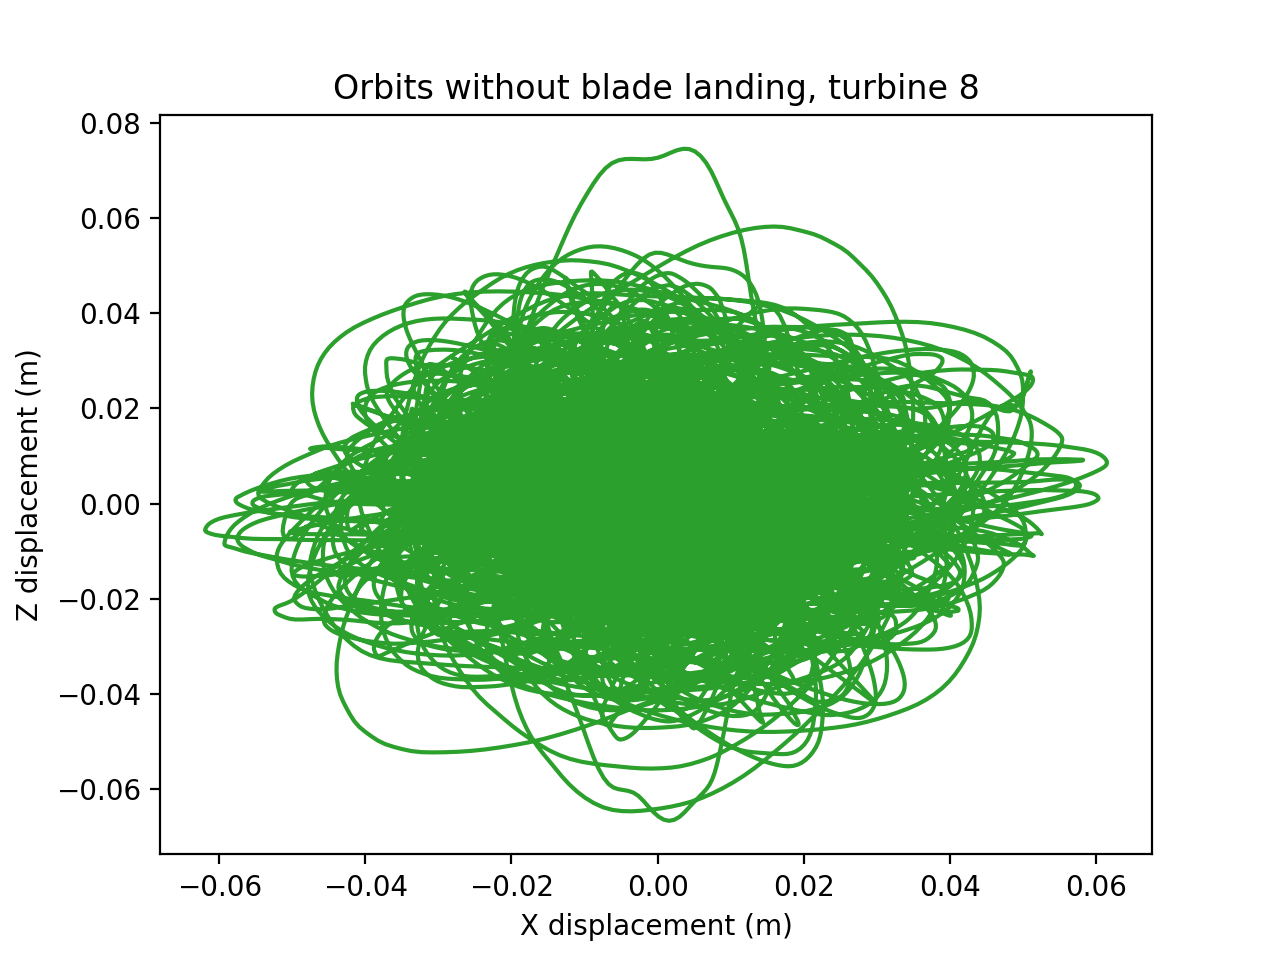

In [13]:
# ORBITS WITHOUT LANDING TOWER

plt.figure()
plt.plot(tower_tb8.pos_x, tower_tb8.pos_z, 'tab:green')
plt.xlabel('X displacement (m)')
plt.ylabel('Z displacement (m)')
plt.title('Orbits without blade landing, turbine 8')
plt.savefig('tb8_orbits_tower_before_landing', dpi=300)

<IPython.core.display.Javascript object>


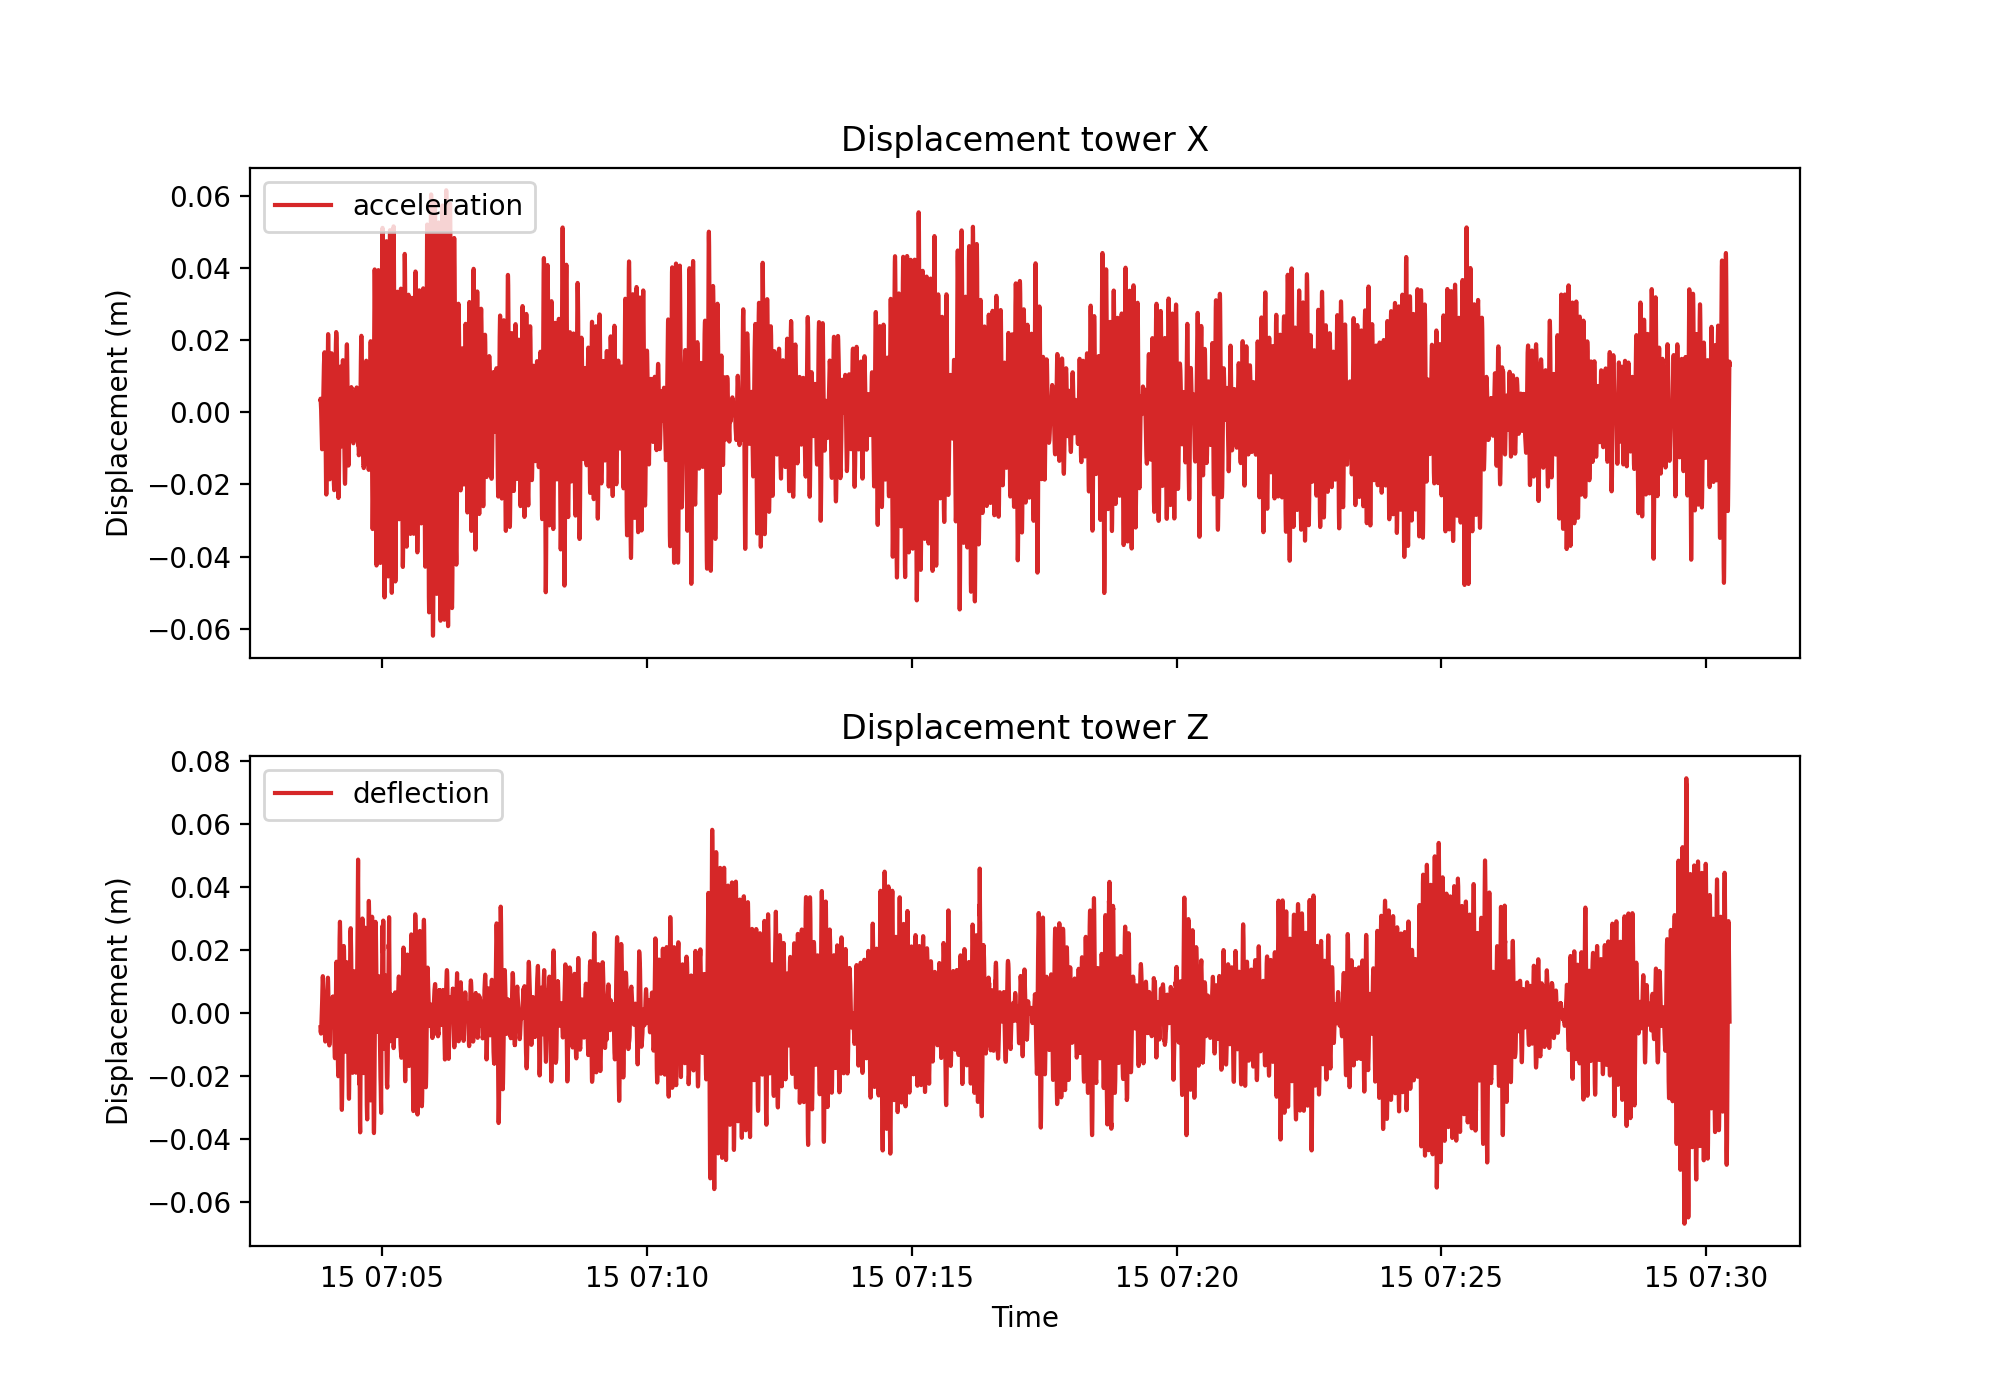

Text(0.5, 0, 'Time')

In [27]:
fig, axs = plt.subplots(2, sharex=True, figsize= (10,7))

axs[0].plot(tower_tb8.pos_x, 'tab:red', label= 'displacement')
axs[0].set_title("Displacement tower X")
axs[0].set(ylabel='Displacement (m)')
#axs[0].axvline(x=blade_landing1, color='b', label= 'blade landing')
#axs[0].axvline(x=blade_landing2, color='b', label= 'blade landing')
#axs[0].axvline(x=blade_landing3, color='b', label= 'blade landing')
axs[0].legend(loc="upper left")

axs[1].plot(tower_tb8.pos_z, 'tab:red', label='displacement')
axs[1].set_title("Displacement tower Z")
axs[1].set(ylabel='Displacement (m)')
#axs[1].axvline(x=blade_landing1, color='b', label= 'blade landing')
#axs[1].axvline(x=blade_landing2, color='b', label= 'blade landing')
#axs[1].axvline(x=blade_landing3, color='b', label= 'blade landing')
axs[1].legend(loc="upper left")

plt.xlabel('Time')
#plt.savefig('displacement_blade_landings', dpi=300)

<IPython.core.display.Javascript object>


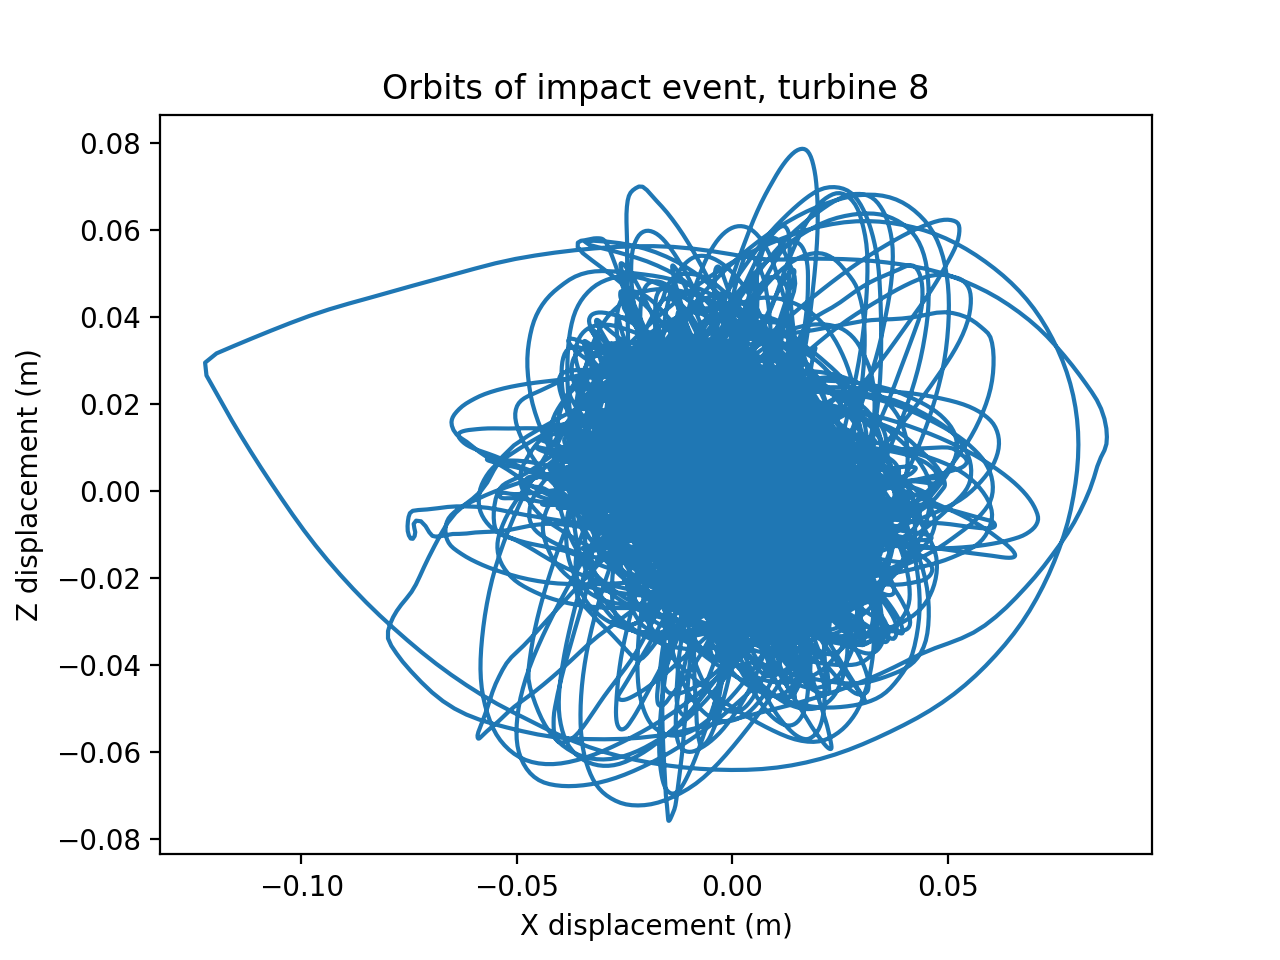

In [14]:
# ORBITS IMPACT EVENT TOWER

plt.figure()
plt.plot(tower_impact_tb8.pos_x, tower_impact_tb8.pos_z, 'tab:blue')
plt.xlabel('X displacement (m)')
plt.ylabel('Z displacement (m)')
plt.title('Orbits of impact event, turbine 8')
plt.savefig('tb8_orbits_tower_impact', dpi=300)

<IPython.core.display.Javascript object>


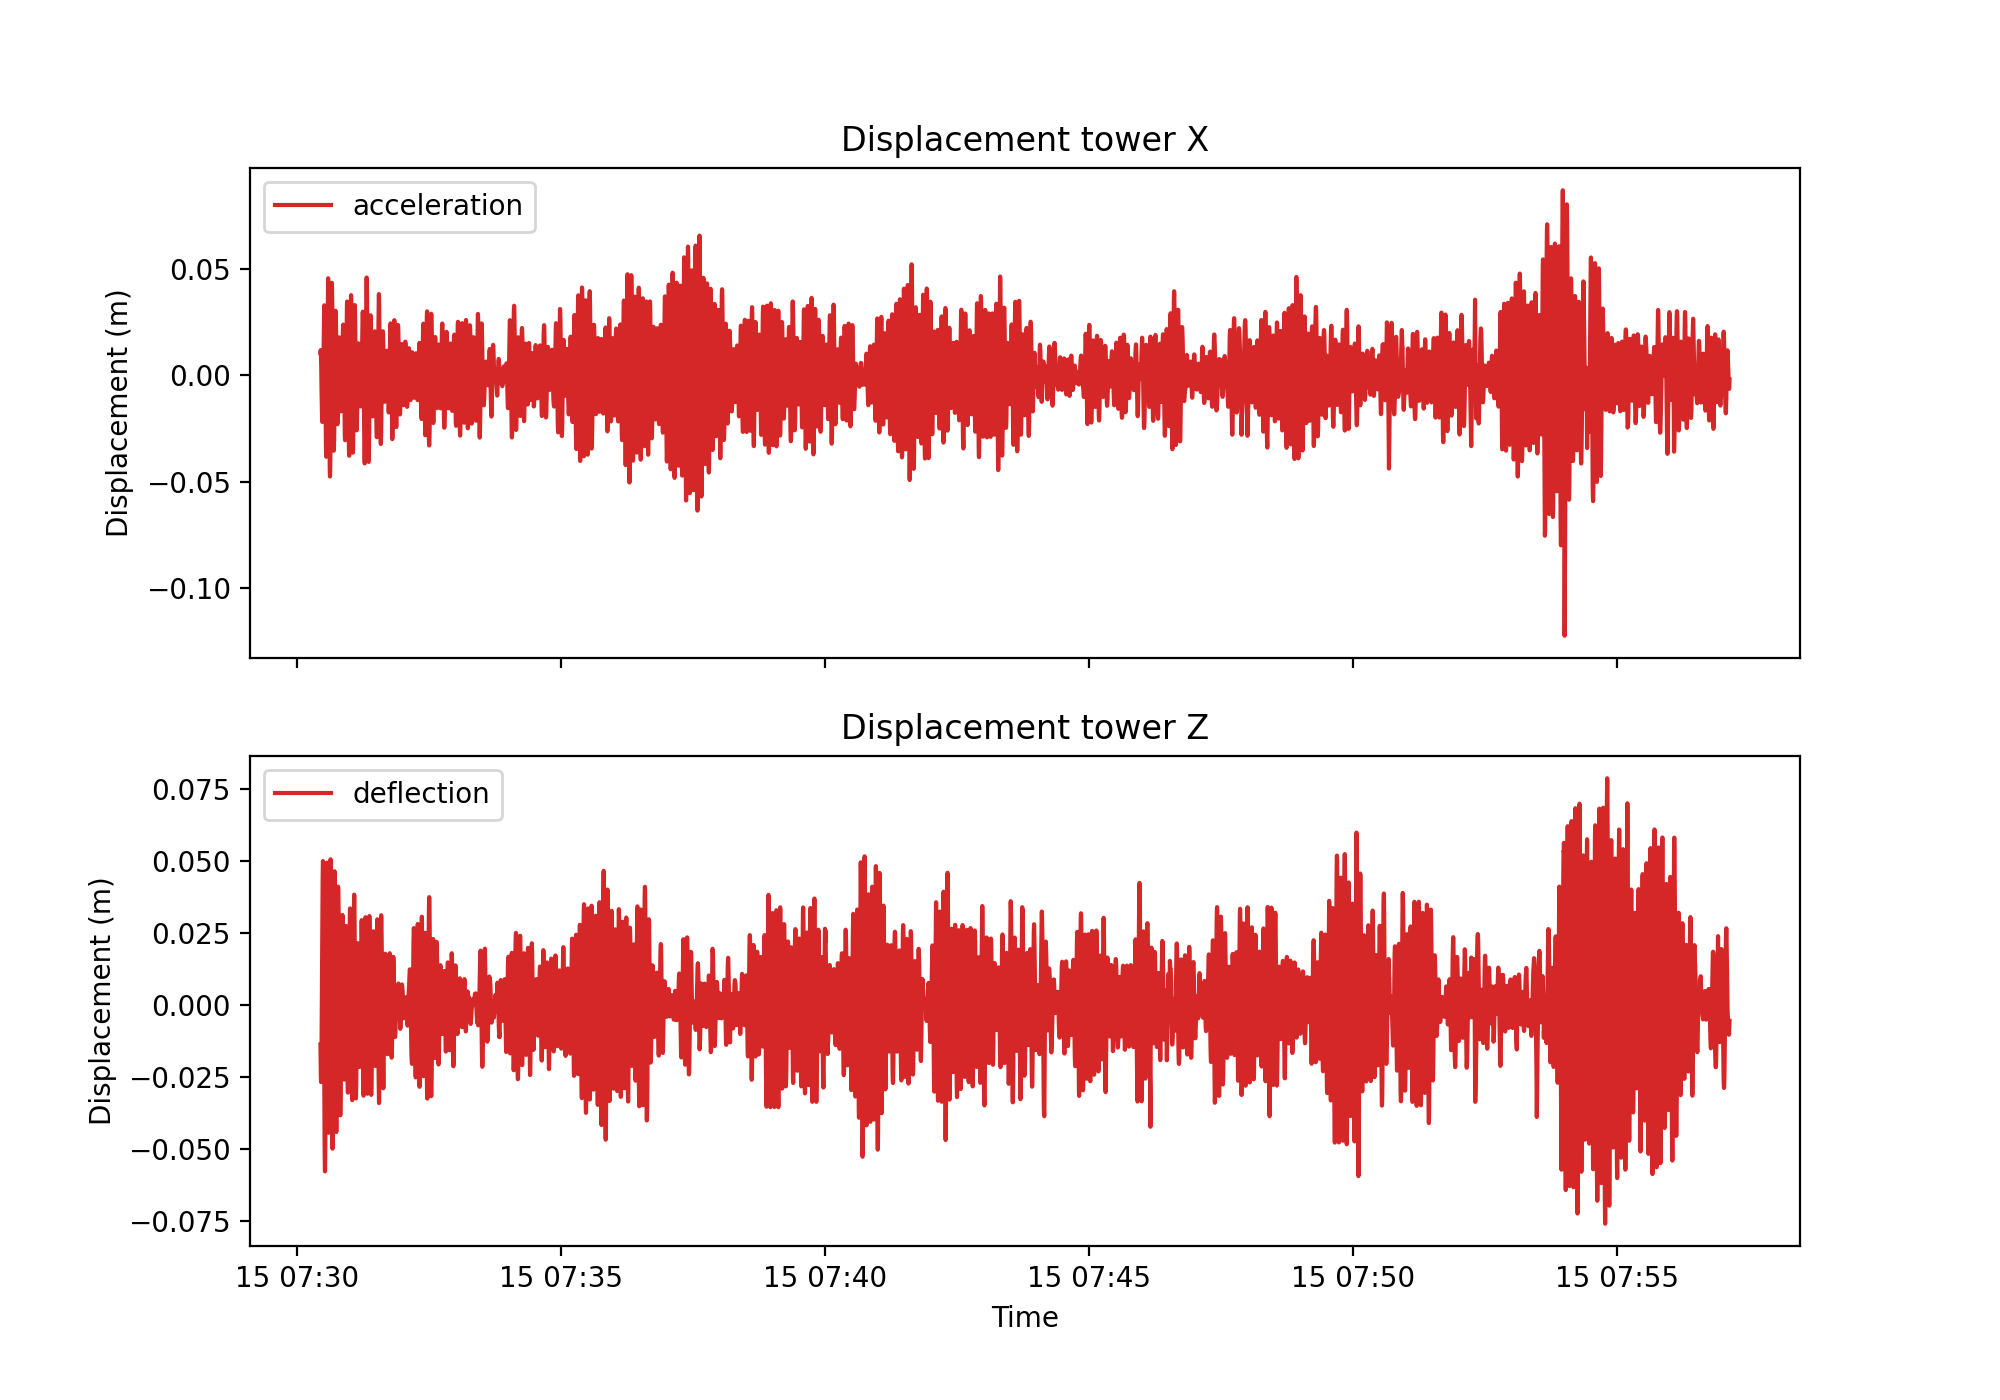

Text(0.5, 0, 'Time')

In [26]:
fig, axs = plt.subplots(2, sharex=True, figsize = (10,7))

axs[0].plot(tower_impact_tb8.pos_x, 'tab:red', label= 'displacement')
axs[0].set_title("Displacement tower X")
axs[0].set(ylabel='Displacement (m)')
#axs[0].axvline(x=blade_landing1, color='b', label= 'blade landing')
#axs[0].axvline(x=blade_landing2, color='b', label= 'blade landing')
#axs[0].axvline(x=blade_landing3, color='b', label= 'blade landing')
axs[0].legend(loc="upper left")

axs[1].plot(tower_impact_tb8.pos_z, 'tab:red', label='displacement')
axs[1].set_title("Displacement tower Z")
axs[1].set(ylabel='Displacement (m)')
#axs[1].axvline(x=blade_landing1, color='b', label= 'blade landing')
#axs[1].axvline(x=blade_landing2, color='b', label= 'blade landing')
#axs[1].axvline(x=blade_landing3, color='b', label= 'blade landing')
axs[1].legend(loc="upper left")

plt.xlabel('Time')
#plt.savefig('displacement_blade_landings', dpi=300)